# Demonstracja działania przeglądania BFS

- Krzysztof Molenda, 2025-07-04

```{prf:algorithm} DFS -- szkic implementacji z wykorzystaniem stosu
:label: dfs-pseudocode3

1. Utwórz stos `S` i dodaj do niego wierzchołek startowy `s`.
2. Dopóki stos `S` nie jest pusty, wykonuj poniższe kroki:  
    1. Pobierz wierzchołek `v` z wierzchołka stosu `S`.
    2. Oznacz wierzchołek `v` jako odwiedzony.
    3. Dla każdego sąsiada `u` wierzchołka `v`:
        1. Jeżeli wierzchołek `u` nie był jeszcze odwiedzony, dodaj go do stosu `S`.
```

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
def visualize_dfs_separate_images(graph, start):
    visited = set()
    stack = [start]
    pos = nx.spring_layout(graph)  # stały układ wierzchołków
    step = 0

    while stack:
        print(f"krok: {step}, stos przed: {stack}")
        v = stack.pop()  # DFS - zdejmujemy ze stosu (LIFO)
        print(f"krok: {step}, stos po: {stack}")
        if v not in visited:
            visited.add(v)
            # Kolorowanie wierzchołków
            node_colors = [
                'red' if node == v else
                'green' if node in visited else
                'lightblue'
                for node in graph.nodes()
            ]
            plt.figure(figsize=(8, 6))
            nx.draw(
                graph, pos,
                with_labels=True,
                node_color=node_colors,
                node_size=700,
                font_size=16
            )
            plt.title(f'Bieżący wierzchołek: {v}\nStos: {stack}')
            plt.show()

            step += 1

            # Dodajemy sąsiadów na stos w odwrotnej kolejności, aby zachować kolejność przeszukiwania
            neighbors = list(graph.neighbors(v))
            neighbors.reverse()
            for u in neighbors:
                if u not in visited and u not in stack:
                    stack.append(u)
                    print(f"krok: {step}, dodajemy sąsiadów - stos: {stack}")

krok: 0, stos przed: [1]
krok: 0, stos po: []


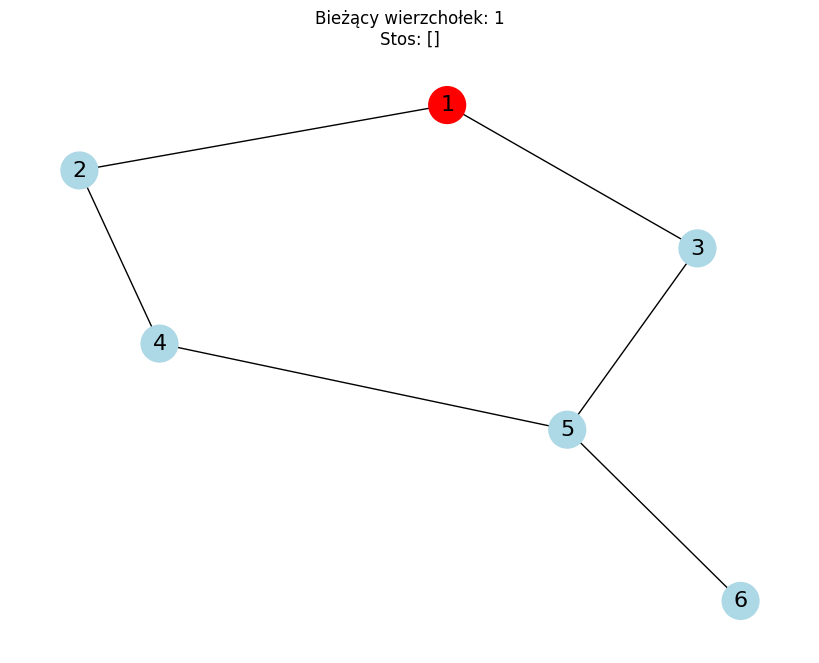

krok: 1, dodajemy sąsiadów - stos: [3]
krok: 1, dodajemy sąsiadów - stos: [3, 2]
krok: 1, stos przed: [3, 2]
krok: 1, stos po: [3]


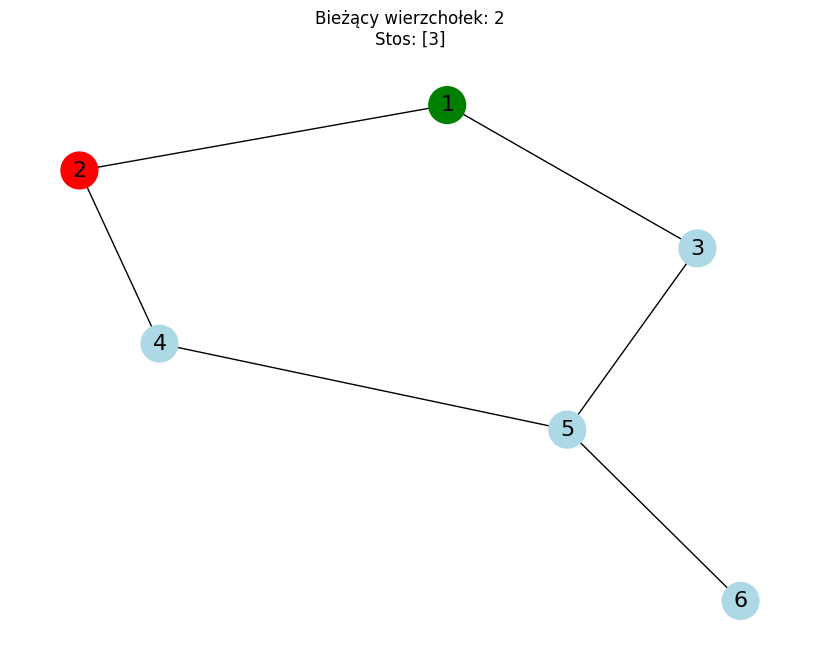

krok: 2, dodajemy sąsiadów - stos: [3, 4]
krok: 2, stos przed: [3, 4]
krok: 2, stos po: [3]


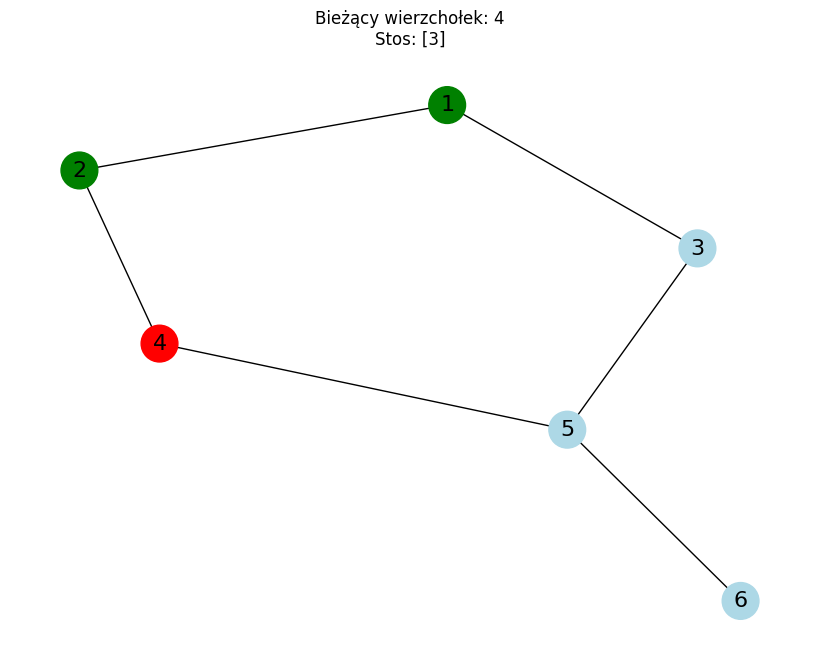

krok: 3, dodajemy sąsiadów - stos: [3, 5]
krok: 3, stos przed: [3, 5]
krok: 3, stos po: [3]


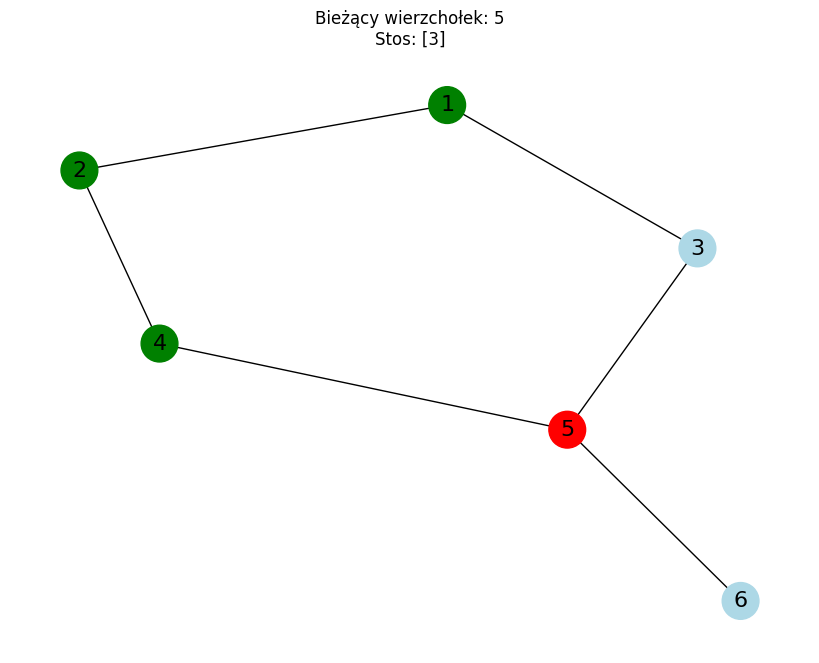

krok: 4, dodajemy sąsiadów - stos: [3, 6]
krok: 4, stos przed: [3, 6]
krok: 4, stos po: [3]


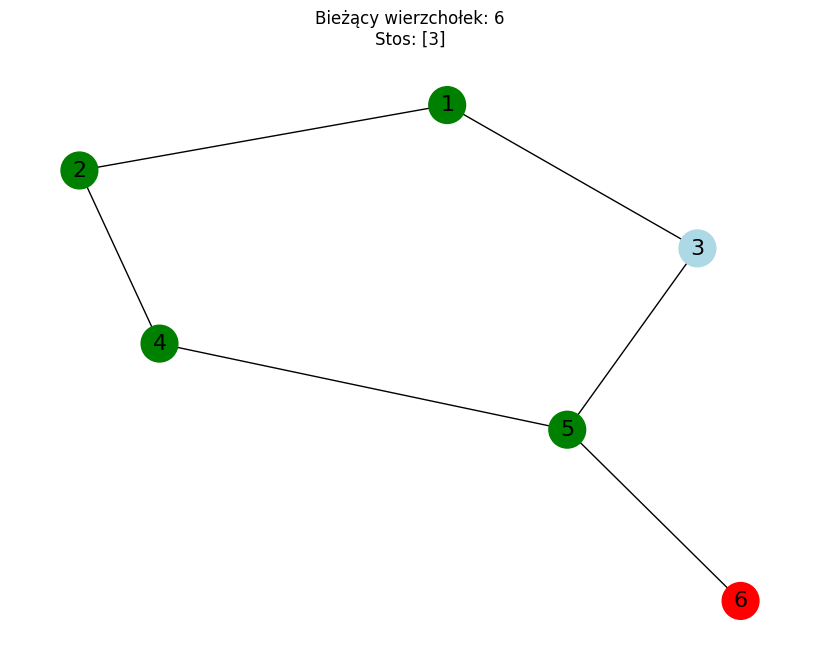

krok: 5, stos przed: [3]
krok: 5, stos po: []


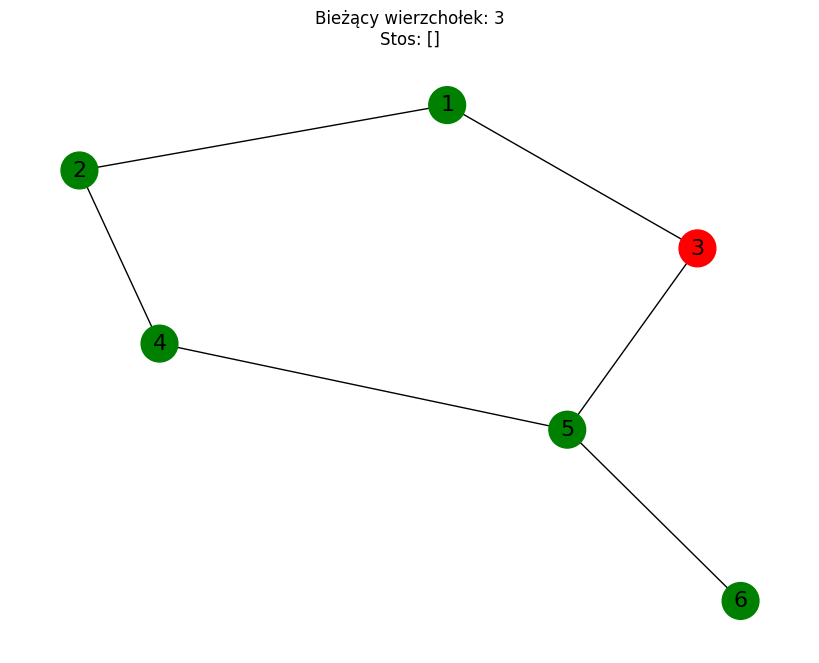

In [3]:
# Przykładowy graf
G = nx.Graph()
edges = [(1, 2), (1, 3), (2, 4), (3, 5), (4, 5), (5, 6)]
G.add_edges_from(edges)

visualize_dfs_separate_images(G, 1)